In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.max_columns=None

In [2]:
data_name = "CYCLONES"
pierna = "DER"

In [3]:
df = pd.read_csv(f"../datos/{data_name}_PIERNA_{pierna}.csv", sep="|")
print(df.shape)
df.head(3)

(6363, 23)


,item,player,replica,angulos_rod_der_x,angulos_rod_der_y,angulos_rod_der_z,momentos_rod_der_x,momentos_rod_der_y,momentos_rod_der_z,emg_der_bf,emg_der_st,emg_der_vl,emg_der_vm,hq_der_lat,hq_der_med,frv_der_frv,velocidad_der_vel,talla_m,peso_kg,posicion_de_juego,pierna_habil,lesion_rodilla_ultimos_3_anos,tipo_de_lesion
0,1,JEFFERSON ANGULO,1,48.321899,-4.337573,-8.497101,-0.071115,-0.005196,0.056340,0.153899,0.281727,0.232937,0.494979,0.660687,0.569170,4.023742,3.112761,1.75,72.45,defensa lateral,derecha,no,no
1,1,JEFFERSON ANGULO,2,36.976704,-4.768758,-6.886652,0.055122,-0.013010,0.017787,0.282068,0.293743,0.230157,0.392641,1.225543,0.748122,4.190571,3.056547,1.75,72.45,defensa lateral,derecha,no,no
2,1,JEFFERSON ANGULO,3,53.867855,7.628788,-21.518278,0.060003,-0.011600,0.051897,0.471769,0.244241,0.071327,0.380602,6.614168,0.641722,4.518857,2.899150,1.75,72.45,defensa lateral,derecha,no,no


In [53]:
var_interes = "hq_der_med"

In [54]:
prom_curve = df.groupby(["item"]).agg({var_interes: "mean"})
prom_curve = prom_curve.reset_index()
prom_curve["units"] = "prom"
prom_curve["type"] = "prom"
prom_curve

,item,hq_der_med,units,type
0,1,1.054194,prom,prom
1,2,1.096334,prom,prom
2,3,1.099109,prom,prom
3,4,1.003479,prom,prom
4,5,0.976802,prom,prom
...,...,...,...,...
96,97,3.922693,prom,prom
97,98,3.699478,prom,prom
98,99,3.454867,prom,prom
99,100,3.511894,prom,prom


In [55]:
corr = (
    df
    .pivot_table(
        index=["item"], 
        columns=["player", "replica"], 
        values=[var_interes]
    )
    .corr(method="spearman")
)
ix = corr.index
corr = corr.reset_index(drop=True)
corr.columns = corr.index

mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = True
corr[mask] = np.nan
(
    corr
    .style
    .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
    .highlight_null(color='#f1f1f1')  # Color NaNs grey
    .format(precision=2)
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,nan,0.67,0.82,0.56,0.78,0.67,0.63,0.77,0.53,0.57,0.14,0.92,-0.11,-0.46,0.25,0.59,0.66,0.62,-0.56,0.50,0.26,0.35,0.82,0.66,0.20,-0.75,0.33,0.52,0.26,0.58,0.41,0.36,0.35,0.50,0.83,0.75,0.56,0.38,0.37,0.41,-0.19,0.16,0.72,0.34,0.42,0.34,0.86,0.02,0.77,0.77,0.65,-0.01,0.34,0.34,0.56,0.71,0.61,0.34,0.72,0.16,0.81,0.86,0.82
1,0.67,nan,0.47,0.74,0.78,0.48,0.38,0.24,0.48,0.50,-0.02,0.72,-0.23,-0.25,0.64,0.36,0.28,0.61,-0.10,0.08,0.22,0.46,0.49,0.53,0.53,-0.14,0.53,0.46,0.60,0.65,0.66,0.61,0.69,0.76,0.54,0.43,0.74,0.72,0.61,0.80,0.05,0.36,0.32,0.22,0.23,0.61,0.74,0.25,0.51,0.59,0.41,0.45,0.40,0.55,0.55,0.22,0.80,0.38,0.35,0.53,0.33,0.51,0.59
2,0.82,0.47,nan,0.64,0.62,0.84,0.41,0.81,0.46,0.57,0.00,0.73,-0.03,-0.20,0.29,0.73,0.57,0.59,-0.40,0.26,0.11,0.57,0.90,0.67,0.12,-0.73,0.22,0.55,0.12,0.43,0.49,0.38,0.42,0.42,0.70,0.84,0.56,0.48,0.50,0.29,-0.35,0.26,0.53,0.21,0.27,0.44,0.70,-0.07,0.69,0.72,0.82,0.09,0.30,0.40,0.57,0.56,0.57,0.41,0.85,0.29,0.78,0.81,0.75
3,0.56,0.74,0.64,nan,0.80,0.79,0.37,0.37,0.71,0.78,-0.32,0.59,-0.44,-0.28,0.57,0.75,0.31,0.69,0.06,0.06,0.36,0.82,0.60,0.50,0.72,-0.24,0.59,0.47,0.43,0.62,0.70,0.75,0.83,0.60,0.64,0.69,0.84,0.78,0.83,0.73,-0.16,0.20,0.23,0.43,0.21,0.75,0.73,0.49,0.54,0.72,0.75,0.48,0.25,0.64,0.81,0.28,0.92,0.29,0.61,0.63,0.47,0.44,0.58
4,0.78,0.78,0.62,0.80,nan,0.72,0.54,0.49,0.80,0.81,-0.16,0.85,-0.39,-0.46,0.47,0.69,0.50,0.65,-0.26,0.35,0.48,0.52,0.65,0.57,0.66,-0.45,0.62,0.40,0.35,0.68,0.52,0.61,0.57,0.63,0.77,0.70,0.79,0.66,0.58,0.69,-0.15,0.12,0.48,0.46,0.41,0.58,0.85,0.36,0.68,0.81,0.65,0.24,0.38,0.48,0.81,0.46,0.86,0.16,0.60,0.36,0.60,0.67,0.71
5,0.67,0.48,0.84,0.79,0.72,nan,0.38,0.68,0.67,0.76,-0.20,0.66,-0.26,-0.36,0.36,0.81,0.46,0.57,-0.22,0.25,0.29,0.71,0.82,0.62,0.47,-0.55,0.48,0.44,0.06,0.58,0.55,0.54,0.59,0.53,0.72,0.88,0.74,0.62,0.64,0.45,-0.42,0.00,0.40,0.38,0.18,0.64,0.68,0.19,0.66,0.76,0.83,0.09,0.27,0.41,0.80,0.45,0.72,0.22,0.81,0.40,0.64,0.61,0.71
6,0.63,0.38,0.41,0.37,0.54,0.38,nan,0.57,0.56,0.48,0.03,0.55,-0.30,-0.73,-0.11,0.54,0.80,0.40,-0.53,0.82,0.60,0.12,0.40,0.20,0.28,-0.67,0.24,0.16,-0.07,0.13,0.07,0.10,0.10,0.16,0.81,0.43,0.21,0.00,0.13,0.05,-0.28,-0.36,0.73,0.77,0.39,-0.00,0.58,0.31,0.63,0.64,0.32,-0.24,-0.25,-0.14,0.35,0.75,0.32,-0.05,0.29,-0.21,0.63,0.30,0.37
7,0.77,0.24,0.81,0.37,0.49,0.68,0.57,nan,0.34,0.52,0.02,0.70,-0.11,-0.43,-0.14,0.69,0.72,0.47,-0.73,0.56,0.26,0.26,0.79,0.51,-0.00,-0.90,0.08,0.43,-0.19,0.26,0.10,0.09,0.07,0.08,0.71,0.73,0.26,0.15,0.14,0.00,-0.52,-0.10,0.69,0.34,0.29,0.13,0.59,-0.18,0.74,0.53,0.66,-0.32,0.09,0.08,0.46,0.77,0.31,0.00,0.74,-0.10,0.84,0.74,0.62
8,0.53,0.48,0.46,0.71,0.80,0.67,0.56,0.34,nan,0.84,-0.36,0.59,-0.40,-0.53,0.34,0.68,0.56,0.48,-0.11,0.43,0.62,0.47,0.49,0.39,0.74,-0.41,0.71,0.18,0.10,0.50,0.31,0.46,0.46,0.47,0.72,0.66,0.69,0.50,0.49,0.53,-0.24,-0.16,0.37,0.72,0.32,0.50,0.70,0.46,0.50,0.82,0.60,0.07,0.11,0.28,0.82,0.38,0.77,0.04,0.38,0.20,0.55,0.40,0.46
9,0.57,0.50,0.57,0.78,0.81,0.76,0.48,0.52,0.84,nan,-0.50,0.65,-0.63,-0.48,0.22,0.84,0.44,0.66,-0.24,0.32,0.55,0.61,0.63,0.42,0.74,-0.41,0.61,0.19,0.13,0.56,0.34,0.52,0.49,0.32,0.80,0.73,0.68,0.57,0.52,0.55,-0.43,-0.15,0.42,0.61,0.36,0.51,0.76,0.44,0.68,0.74,0.70,0.11,0.08,0.38,0.90,0.39,0.81,0.06,0.60,0.30,0.57,0.48,0.56


In [56]:
prop_corr = corr.apply(lambda x: (x>0.6).mean())
prop_corr.describe()

count    63.000000
mean      0.240867
std       0.151862
min       0.000000
25%       0.103175
50%       0.269841
75%       0.333333
max       0.555556
dtype: float64

In [57]:
# prop_corr.sort_values()

In [59]:
# (prop_corr > 0.5).mean()
(prop_corr > 0.2).mean()

0.6666666666666666

In [63]:
# ix_interes = prop_corr[prop_corr<0.1].index
ix_interes = prop_corr[prop_corr>0.3].index

pd.Series(
    [x[1] for x in ix[ix_interes]]
).value_counts()

DEYMAN GUILLERMO CABEZAS       3
JUAN JOSE COBO                 3
SANTIAGO OVIEDO                3
DAIRO BUSTOS                   2
JEFFERSON ANGULO               2
JUAN JOSE BETANCOURT           2
SANTIAGO CASTAN╠âO VICTORIA    2
SERGIO ANDRES LENIS            2
WAINER MARQUEZ VILLANUEVA      2
JEREMY VINTEX                  1
JORGE SAMUEL PUERTO            1
JUAN DAVID ACEVEDO             1
JUAN DAVID RIVERA              1
KLEYBER DE LA ROSA             1
VICTOR ALFONSO VIDAL           1
Name: count, dtype: int64

In [64]:
subject_interes_in = [
    "JUAN JOSE BETANCOURT", 
    "DEYMAN GUILLERMO CABEZAS", 
    # "VICTOR ALFONSO VIDAL"
]
subject_interes_out = [
    # "JEFFERSON ANGULO",
    # "DIEGO ARNEDO",
    "KLEYBER DE LA ROSA",
]
# subject_interes_in = [
#     "DEYMAN GUILLERMO CABEZAS",
#     "JHOAN SEBASTIAN FLOREZ"
# ]
# subject_interes_out = [
#     "JUAN DAVID RIVERA",
#     "KLEYBER DE LA ROSA",
#     "JUAN JOSE BETANCOURT",
# ]

In [65]:
df_plot = df[df["player"].isin(subject_interes_in+subject_interes_out)].copy()
df_plot["units"] = df_plot["player"]+"-"+df_plot["replica"].astype(str)
df_plot["type"] = np.where(df_plot["player"].isin(subject_interes_out), "out", "in")

df_plot = pd.concat([prom_curve, df_plot])
print(df_plot.shape)
df_plot.tail(3)

(1010, 25)


,item,hq_der_med,units,type,player,replica,angulos_rod_der_x,angulos_rod_der_y,angulos_rod_der_z,momentos_rod_der_x,momentos_rod_der_y,momentos_rod_der_z,emg_der_bf,emg_der_st,emg_der_vl,emg_der_vm,hq_der_lat,frv_der_frv,velocidad_der_vel,talla_m,peso_kg,posicion_de_juego,pierna_habil,lesion_rodilla_ultimos_3_anos,tipo_de_lesion
6360,101,2.904134,DEYMAN GUILLERMO CABEZAS-1,in,DEYMAN GUILLERMO CABEZAS,1.0,48.127266,-8.095604,1.146525,0.060388,-0.054902,0.034687,0.005635,0.015821,0.004841,0.005448,1.164084,2.859870,2.732863,1.74,69.35,delantero,derecha,si,lca derecha
6361,101,0.993388,DEYMAN GUILLERMO CABEZAS-2,in,DEYMAN GUILLERMO CABEZAS,2.0,35.018974,-5.725236,4.607221,0.032014,-0.027478,0.013135,0.004669,0.008140,0.008481,0.008194,0.550497,1.148989,2.481403,1.74,69.35,delantero,derecha,si,lca derecha
6362,101,4.735252,DEYMAN GUILLERMO CABEZAS-3,in,DEYMAN GUILLERMO CABEZAS,3.0,47.603584,-7.001600,7.880433,0.069879,-0.017889,0.016856,0.003323,0.017585,0.005798,0.003714,0.573039,1.374227,2.320501,1.74,69.35,delantero,derecha,si,lca derecha


In [66]:
df_plot[["player","lesion_rodilla_ultimos_3_anos"]].drop_duplicates().value_counts()

player                    lesion_rodilla_ultimos_3_anos
DEYMAN GUILLERMO CABEZAS  si                               1
JUAN JOSE BETANCOURT      no                               1
KLEYBER DE LA ROSA        no                               1
Name: count, dtype: int64

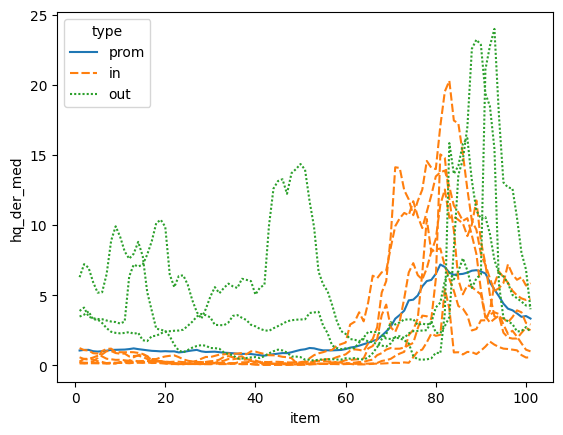

In [67]:
_ = sns.lineplot(
    data=df_plot, 
    x="item",
    y=var_interes,
    hue="type",
    estimator=None,
    units="units",
    style="type"
)

In [ ]:
# analizar todas las variables e identificar para cada jugador si alguna replica es in o out 
# definir que es in o out en cada variable
# identificar dos grupos de jugadores: movimientos promedio, movimientos que pueden ser complejos